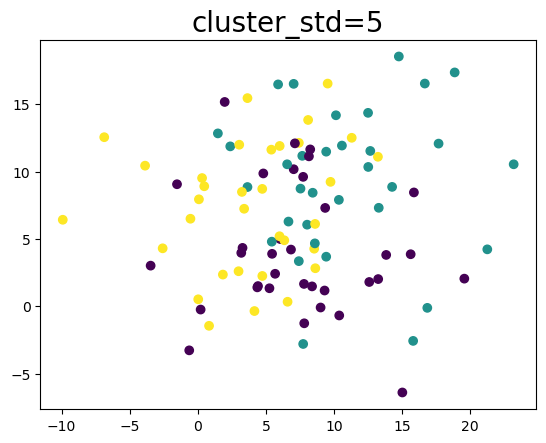

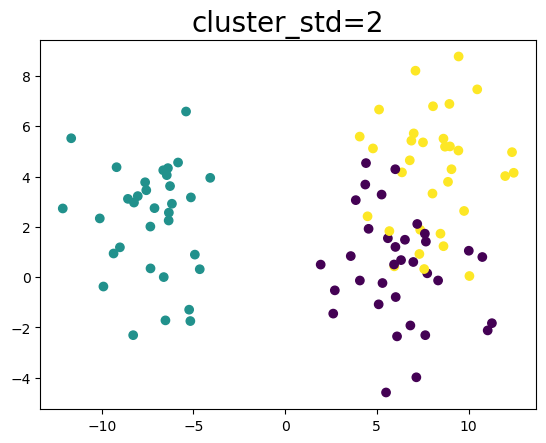

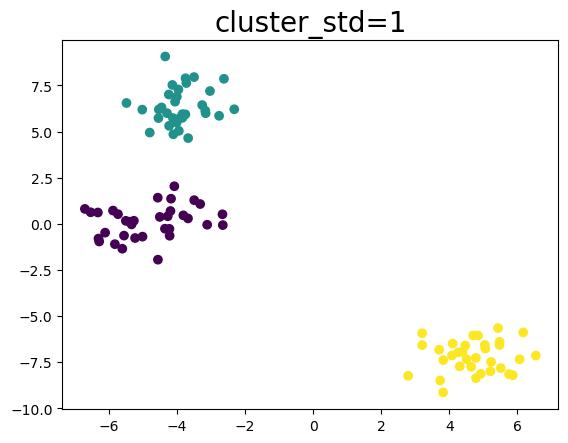

In [31]:
import sklearn.datasets as data
import matplotlib.pyplot as plt

for std in [5,2,1]:
    X, clusters = data.make_blobs(n_samples=100,n_features=2,cluster_std=std)
    plt.scatter(X[:, 0], X[:, 1], c=clusters)
    plt.title(f'cluster_std={std}', fontsize = 20)
    plt.show() 

In [32]:
import numpy as np

# Euclidean distance metric
def dist(x,c):
    return np.sqrt(np.sum((x-c)**2))

# kMeans implementation
def kMeans(k,X,out=False):
    oldLabels = []
    clustLabels = []
    clusterSet = []
    it, nc = 0, -1
    centres = X[np.random.choice(len(X),k),:]
    for c in centres:
        clusterSet.append([np.array(c)])
    while (not (clustLabels == oldLabels) or (it == 0)) and (it<20):
        it+=1
        oldLabels = clustLabels
        clustLabels = []
        for inst in X:
            temp, nc, nm = 1000, -1, 1000
            for i,c in enumerate(centres):
                nm = min(dist(inst,c),nm)
                if temp != nm:
                    nc = i
                    temp = nm
            clusterSet[nc].append(np.array(inst))
            clustLabels.append(nc)
        if (out):
            plt.scatter(X[:, 0], X[:, 1], c=clustLabels)
            plt.title(f'Iteration {it}', fontsize = 10)
            plt.show()
        centres = []
        for c in clusterSet:
            centres.append(np.mean(c,axis=0))
    return clusterSet,clustLabels,centres

In [33]:
# Compute Scores
def computeScore(clusterSet,centres,out=False):
    score, WC, BC = 0, 0, 0
    for i,C in enumerate(clusterSet):
        for x in C:
            WC += dist(x,centres[i])**2

    for i,ci in enumerate(centres):
        for l,cl in enumerate(centres):
            if (i<l):
                BC += dist(ci,cl)**2

    score = BC/WC
    if (out):
        print(f'Score: {round(score,4)} = {round(BC,2)}/{round(WC,2)}')
    return score

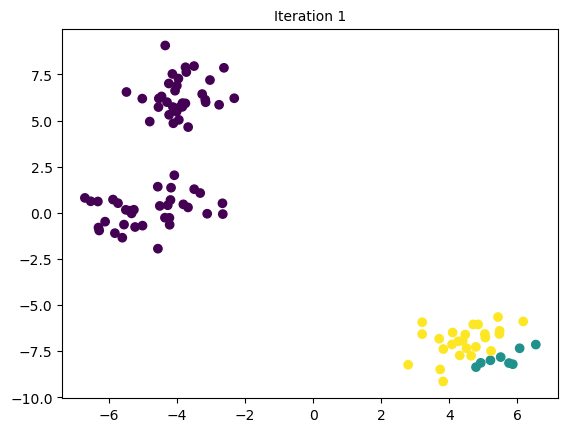

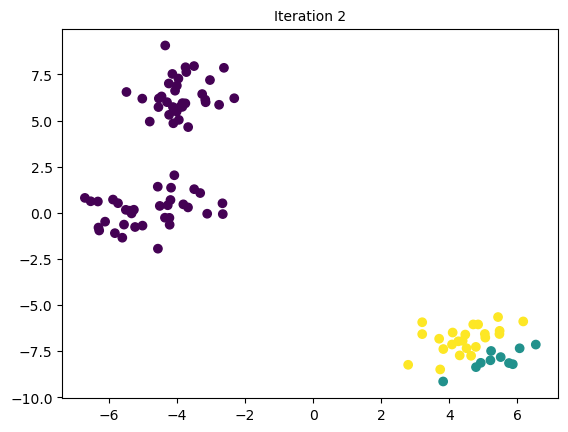

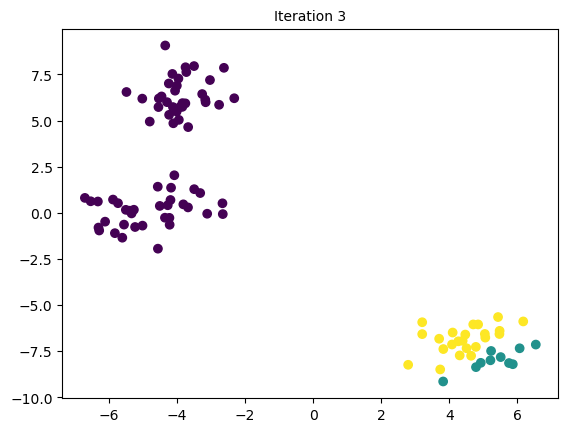

0.16341521062423822

In [34]:
# Example with outputs
clusterSet,clustLabels,centres = kMeans(3,X,out=True)
computeScore(clusterSet,centres)

Score for k=2 is 0.011445362607155259
Score for k=3 is 0.8656791141799628
Score for k=4 is 1.8232409477083764
Score for k=5 is 2.2081525958270607
Score for k=6 is 2.536988178034258
Score for k=7 is 2.4646426929049308
Score for k=8 is 5.4802326736747125
Score for k=9 is 11.490424580341948


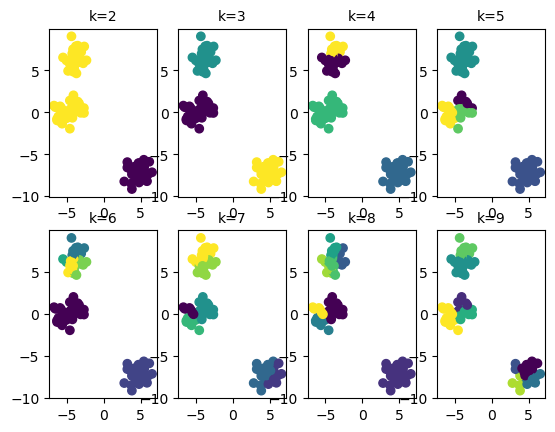

<Figure size 1000x500 with 0 Axes>

In [37]:
for k in range(2,10):
    clusterSet,clustLabels,centres = kMeans(k,X)
    plt.subplot(2, 4, k-1)
    plt.scatter(X[:, 0], X[:, 1], c=clustLabels)
    plt.title(f'k={k}', fontsize = 10)
    s = computeScore(clusterSet,centres)
    print(f'Score for k={k} is {s}')
plt.show()

/home/linus/.conda/envs/condaenv/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


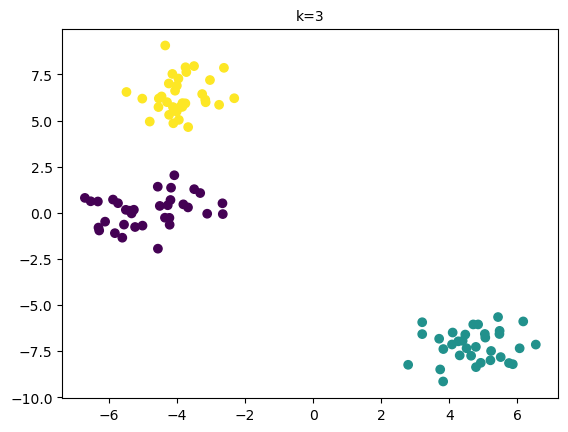

SC = 0.7805, CH = 1443.0715


In [43]:
import sklearn.cluster as cluster
import sklearn.metrics as metrics
k = 3
km = cluster.KMeans(n_clusters=k)
km.fit(X)
SC = metrics.silhouette_score(X,km.labels_,metric='euclidean')
CH = metrics.calinski_harabasz_score(X,km.labels_)
plt.scatter(X[:, 0], X[:, 1], c=km.labels_)
plt.title(f'k={k}', fontsize = 10)
plt.show()
print(f'SC = {round(SC,4)}, CH = {round(CH,4)}')

KMeans(n_clusters=3)
